# Проектная работа 

## Маркетинговый анализ развлекательного приложения **Procrastinate Pro+**

## Описание проекта

Проект посвящен маркетинговому анализу развлекательного приложения **Procrastinate Pro+** на основе данных о пользователях, привлеченных в период с 1 мая по 27 октября 2019 года. В рамках анализа были использованы следующие датасеты:
* лог сервера с данными об их посещениях `visits_info_short.csv`
* выгрузка их покупок за этот период `orders_info_short.csv`
* рекламные расходы `costs_info_short.csv`

### Структура датасетов:

### Структура **visits_info_short.csv**:

* **User Id** — уникальный идентификатор пользователя,
* **Region** — страна пользователя,
* **Device** — тип устройства пользователя,
* **Channel** — идентификатор источника перехода,
* **Session Start** — дата и время начала сессии,
* **Session End** — дата и время окончания сессии.

### Структура **orders_info_short.csv**:

* **User Id** — уникальный идентификатор пользователя,
* **Event Dt** — дата и время покупки,
* **Revenue** — сумма заказа.

### Структура **costs_info_short.csv**:

* **dt** — дата проведения рекламной кампании,
* **Channel** — идентификатор рекламного источника,
* **costs** — расходы на эту кампанию.

## Загрузка библотек

In [1]:
import pandas as pd 
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
import numpy as np


## Загрузка данных

In [2]:
try:
    visit = pd.read_csv('C:\\Users\\shmam\\datasets\\visits_info_short.csv')
except:
    visit = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')

try:
    order = pd.read_csv('C:\\Users\\shmam\\datasets\\orders_info_short.csv')
except:
    order = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')

try:
    cost = pd.read_csv('C:\\Users\\shmam\\datasets\\costs_info_short.csv')
except:
    cost = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

## Предобработка данных

Создадим функции для получения информации о датасетах

In [3]:
#создаем функцию  для ознакомления с датасетами
def table_info(table_name):
    display(table_name.head())
    print(table_name.info())
    print(f'В таблице пропущенно:')
    print(f'{table_name.isna().sum()}')
    print(f'В таблицк дубликатов: {visit.duplicated().sum()}')

In [4]:
#создаем функцию  для проверки изменений
def end_info(table_name):
    print(f'В таблицк дубликатов: {visit.duplicated().sum()}')
    print(table_name.info())

### Датасет **visit**

In [5]:
table_info(visit)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
В таблице пропущенно:
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
В таблицк дубликатов: 0


In [6]:
#переименовываем название столбцов 
visit.columns = ['user_id','region','device','channel','session_start','session_end']

In [7]:
#проверяем уникальные значения 
for name in ['region','device','channel']:
    print(f'Уникальные значения в столбце {name}')
    print(visit[name].unique())

Уникальные значения в столбце region
['United States' 'UK' 'France' 'Germany']
Уникальные значения в столбце device
['iPhone' 'Mac' 'Android' 'PC']
Уникальные значения в столбце channel
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [8]:
#изменяем тип данных
visit['session_start'] = pd.to_datetime(visit['session_start'])
visit['session_end'] = pd.to_datetime(visit['session_end'])

In [9]:
end_info(visit)

В таблицк дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None


Датасет **visit** был обработан, при этом имена столбцов приведены к стандарту `snake_case`. Кроме того, типы данных некоторых столбцов были изменены. В датасете не было обнаружено пропущенных значений или дубликатов.

### Датасет **order**

In [10]:
table_info(order)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
В таблице пропущенно:
User Id     0
Event Dt    0
Revenue     0
dtype: int64
В таблицк дубликатов: 0


In [11]:
order.columns = ['user_id','event_dt','revenue']

order['event_dt'] = pd.to_datetime(order['event_dt'])

In [12]:
end_info(order)

В таблицк дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None


Датасет **order** был обработан, при этом имена столбцов приведены к стандарту `snake_case`. Кроме того, типы данных некоторых столбцов были изменены. В датасете не было обнаружено пропущенных значений или дубликатов.

### Датасет **cost**

In [13]:
table_info(cost)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
В таблице пропущенно:
dt         0
Channel    0
costs      0
dtype: int64
В таблицк дубликатов: 0


In [14]:
cost.columns = ['dt','channel','costs']

cost['dt'] = pd.to_datetime(cost['dt'])

print(f'Уникальные значения в столбце channel')
print(cost['channel'].unique())

Уникальные значения в столбце channel
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


In [15]:
end_info(cost)

В таблицк дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
None


Датасет **cost** был обработан, при этом имена столбцов приведены к стандарту `snake_case`. Кроме того, типы данных некоторых столбцов были изменены. В датасете не было обнаружено пропущенных значений или дубликатов.

### Вывод

Все три предоставленные датасеты **visit**, **order** и **cost** были успешно обработаны. Для каждого датасета были выполнены следующие действия:

* Имена столбцов были приведены к стандарту `snake_case` для соблюдения единообразия.
* Типы данных некоторых столбцов были изменены для обеспечения корректного представления данных.
* Проверка на наличие пропущенных значений и дубликатов показала отсутствие таковых в каждом из датасетов.

Таким образом, все три датасета были подготовлены для дальнейшего анализа и использования в соответствии со стандартами и требованиями к качеству данных.

## Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии

Создадим функции необходимые для анализа и вузализации.

In [16]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        result = result.fillna(0).cumsum(axis=1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# Устанавливаем стиль Seaborn и параметры графиков
sns.set(style="whitegrid", palette="muted")

# Функция для сглаживания фрейма
def filter_data(df, window):
    for column in df.columns:
        df[column] = df[column].rolling(window).mean()
    return df

# Функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window):
    fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex='col', sharey='row')
    
    # Из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    # Стоимость привлечения
    cac_history = roi_history[['cac']]
    
    # Из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # Кривые LTV
    sns.lineplot(data=ltv.T, ax=axes[0, 0])
    axes[0, 0].set_xlabel('Лайфтайм')
    axes[0, 0].set_title('LTV')

    # Динамика LTV
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=[name for name in ltv_history.index.names if name != 'dt'],
        values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window)
    sns.lineplot(data=filtered_data, ax=axes[0, 1])
    axes[0, 1].set_xlabel('Дата привлечения')
    axes[0, 1].set_title(f'Динамика LTV пользователей на {horizon}-й день')

    # Динамика CAC
    filtered_data = cac_history.pivot_table(
        index='dt', columns=[name for name in cac_history.index.names if name != 'dt'],
        values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window)
    sns.lineplot(data=filtered_data, ax=axes[0, 2])
    axes[0, 2].set_xlabel('Дата привлечения')
    axes[0, 2].set_title('CAC')

    # Кривые ROI
    sns.lineplot(data=roi.T, ax=axes[1, 0])
    axes[1, 0].axhline(y=1, color='red', linestyle='-', label='Точка безубыточности')
    axes[1, 0].set_xlabel('Лайфтайм')
    axes[1, 0].set_title('ROI')

    # Динамика ROI
    filtered_data = roi_history.pivot_table(
        index='dt', columns=[name for name in roi_history.index.names if name != 'dt'],
        values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window)
    sns.lineplot(data=filtered_data, ax=axes[1, 1])
    axes[1, 1].axhline(y=1, color='red', linestyle='-', label='Точка безубыточности')
    axes[1, 1].set_xlabel('Дата привлечения')
    axes[1, 1].set_title(f'Динамика ROI пользователей на {horizon}-й день')

    # Добавляем легенды
    axes[1, 0].legend()
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex='col', sharey='row')
    
    # Исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Кривые конверсии
    sns.lineplot(data=conversion.T, ax=axes[0])
    axes[0].set_xlabel('Лайфтайм')
    axes[0].set_title('CR')

    # Динамика конверсии
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=[name for name in conversion_history.index.names if name != 'dt'],
        values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window)
    sns.lineplot(data=filtered_data, ax=axes[1])
    axes[1].set_xlabel('Дата привлечения')
    axes[1].set_title(f'Динамика CR пользователей на {horizon}-й день')

    plt.tight_layout()
    plt.show()

# Функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex='col', sharey='row')
    
    # Исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Если в индексах таблицы удержания только payer, добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # Кривые удержания платящих пользователей
    sns.lineplot(data=retention.query('payer == True').droplevel('payer').T, ax=axes[0])
    axes[0].set_xlabel('Лайфтайм')
    axes[0].set_title('RR')

    # Динамика удержания платящих
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=[name for name in retention_history.index.names if name not in ['dt', 'payer']],
        values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window)
    sns.lineplot(data=filtered_data, ax=axes[1])
    axes[1].set_xlabel('Дата привлечения')
    axes[1].set_title(f'Динамика RR пользователей на {horizon}-й день')

    plt.tight_layout()
    plt.show()

# Основная функция для вызова всех графиков
def split(dimensions, window):
    # Считаем LTV и ROI
    ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles.query('channel != "organic"'), order, observation_date, horizon_days, dimensions=dimensions
    )
    plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=window)

    retention_raw, retention_grouped, retention_history = get_retention(
        profiles.query('channel != "organic"'), visit, observation_date, horizon_days, dimensions=dimensions
    )
    plot_retention(retention_grouped, retention_history, horizon_days, window=window)

    conversion_raw, conversion_grouped, conversion_history = get_conversion(
        profiles.query('channel != "organic"'), order, observation_date, horizon_days, dimensions=dimensions
    )
    plot_conversion(conversion_grouped, conversion_history, horizon_days, window=window)

### Вывод

Были написаны функции, предназначенные для анализа ключевых показателей в области пользовательского поведения и финансовой эффективности. 

Функции `get_profiles()`, `get_retention()`, `get_conversion()`, и `get_ltv()` позволяют вычислять профили пользователей, коэффициент удержания (Retention Rate), конверсию, а также пожизненную ценность клиента (LTV) соответственно. 

Дополнительно, функции `filter_data()`, `plot_retention()`, `plot_conversion()`, и `plot_ltv_roi()` обеспечивают возможность обработки и визуализации данных, что облегчает интерпретацию результатов и принятие управленческих решений. 

Эти инструменты эффективно работают вместе для предоставления комплексного анализа данных, что особенно ценно для стратегического планирования и оптимизации маркетинговых стратегий.

## Исследовательский анализ данных

### Профили пользователей 

Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['first_ts'] = pd.to_datetime(profiles['first_ts'])
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = pd.to_datetime(profiles['first_ts']).dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [21]:
#определим профили пользователей
profiles = get_profiles(visit, order, cost)

profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
profiles['month'] = pd.to_datetime(profiles['first_ts']).dt.month

#определим минимальную дату
min_analysis_date = profiles['dt'].min()
#определим максимальную дату
observation_date = profiles['dt'].max() 

print(f'Минимальная дата привлевчения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлевчения пользователей: {observation_date}')

Минимальная дата привлевчения пользователей: 2019-05-01
Максимальная дата привлевчения пользователей: 2019-10-27


Для анализа были подготовлены профили пользователей, содержащие информацию о датах регистрации, покупках и суммах покупок. Также были определены крайние даты привлечения пользователей: **2019-05-01** (минимальная) и **2019-10-27** (максимальная). 

### Регионы пользователей

Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [22]:
#напишем функцию для групировки
def share(group,f_col,t_col):
    share = pd.DataFrame()
    share[f_col] = profiles.groupby(group)['user_id'].count()
    share[t_col] = profiles.query('payer == True').groupby(group)['user_id'].count()
    share['share_users'] = ((share[t_col] / share[f_col]) * 100)
    share = share.sort_values(by='share_users', ascending=False).style.format({'share_users': '{:.1f}%'})
    display(share)

share('region','users_сount','payer_users_count')

,users_сount,payer_users_count,share_users
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


Результаты анализа географического распределения пользователей представлены в виде таблицы, отражающей количество пользователей и долю платящих пользователей из каждой страны.

Лидером по количеству пользователей является **United States**. Это означает, что наибольшее число пользователей приложения проживает в США.

Помимо этого, **United States** также лидирует по доле платящих пользователей среди всех стран. Таким образом, помимо большой базы пользователей, США демонстрирует высокий уровень монетизации аудитории.

### Устройства пользователей

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [23]:
share('device','users_сount','payer_users_count')

,users_сount,payer_users_count,share_users
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


Результаты анализа представлены в виде таблицы, отражающей количество пользователей и долю платящих пользователей из каждой категории устройств.

Лидером по количеству пользователей является категория **iPhone**. Это означает, что большинство пользователей приложения используют смартфоны iPhone.

Однако лидером по доле платящих пользователей является категория **Mac**. Таким образом, несмотря на меньшее количество пользователей, владельцы устройств Mac демонстрируют наибольшую склонность к совершению покупок в приложении.

### Источники привлечения пользователей 

Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


In [24]:
share('channel','users_сount','payer_users_count')

,users_сount,payer_users_count,share_users
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


Результаты анализа источников привлечения пользователей представлены в виде таблицы, отражающей количество привлеченных пользователей и долю платящих пользователей из каждого источника.

Лидером по количеству привлеченных пользователей является источник **FaceBoom**. Это означает, что данный источник обеспечил наибольший приток новых пользователей приложения.

Кроме того, источник **FaceBoom** также лидирует по доле платящих привлеченных пользователей. Таким образом, пользователи, привлеченные из FaceBoom, демонстрируют наибольшую склонность к совершению покупок в приложении.

### Вывод

В ходе анализа были подготовлены профили пользователей и определен период привлечения новых пользователей **с мая по октябрь 2019 года**. 

Далее были проанализированы различные аспекты пользовательской базы, включая географическое распределение, типы устройств и источники привлечения.

**Рынок США является лидером** как по количеству пользователей, так и по доле платящих пользователей, что свидетельствует о высокой популярности и эффективной монетизации приложения на данном рынке.

Среди устройств **наибольшее количество пользователей приходится на iPhone**, однако **наибольшая доля платящих пользователей наблюдается среди владельцев Mac**.

Источник привлечения **FaceBoom обеспечил наибольший приток новых пользователей и демонстрирует высокую долю платящих привлеченных пользователей**.

## Маркетинг

### Расходы на маркетинг

Посчитайте общую сумму расходов на маркетинг.

In [25]:
print(f'Общая сумма расходов на маркетинг составила {cost["costs"].sum().round()}')

Общая сумма расходов на маркетинг составила 105497.0


### Распределение расходов на маркетинг 

Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [26]:
(
    cost
    .groupby('channel')['costs']
    .sum()
    .sort_values(ascending=False)
)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

Расходы на маркетинг распределены по рекламным источникам следующим образом, **наибольшие траты были на TipTop и FaceBoom**, что указывает на их ключевую роль в маркетинговой стратегии.В то же время как **меньшие суммы были выделены на YRabbit и MediaTornado**.

### Динамика изменения расходов на маркетинг

Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

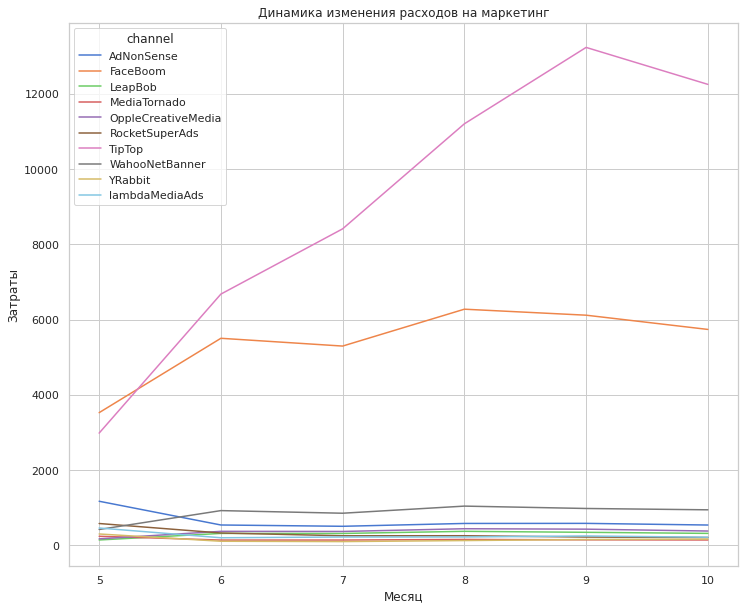

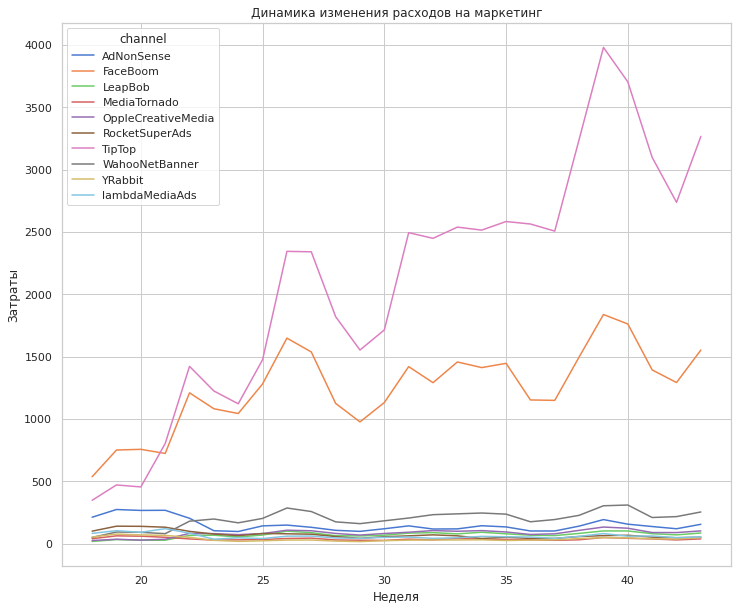

In [27]:
data_m = cost.copy()
data_m['dt'] = pd.to_datetime(data_m['dt'])
data_m['dt'] = data_m['dt'].dt.month
data_m.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    ).plot(                                             
           figsize=(12, 10),
           grid=True,)
plt.title('Динамика изменения расходов на маркетинг')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()
del data_m

data_w = cost.copy()
data_w['dt'] = pd.to_datetime(data_w['dt'])
data_w['dt'] = data_w['dt'].dt.isocalendar().week.astype(int)  
data_w.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    ).plot(                                             
           figsize=(12, 10),
           grid=True,)
plt.title('Динамика изменения расходов на маркетинг')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()
del data_w

Графики динамики расходов на маркетинг по неделям и месяцам показывают, что **источники TipTop и FaceBoom**, несмотря на разные уровни затрат, демонстрируют схожую тенденцию изменения расходов. В **последний месяц наблюдается общее снижение затрат на эти источники**, однако анализ недельного графика свидетельствует о **росте затрат в течение последней недели**. Это указывает на возможную корректировку маркетинговой стратегии или сезонные колебания в расходах.

### Стоимость привлечения пользователя

Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [28]:
display(
    profiles
    .query('channel != "organic"')
    .pivot_table(index='channel',values='acquisition_cost',aggfunc='mean')
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'acquisition_cost_mean'})
    .style.format({'acquisition_cost_mean': '{:.3f}'})
)

,acquisition_cost_mean
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
YRabbit,0.219
MediaTornado,0.219


Исследование стоимости привлечения пользователей показало значительные различия между источниками. **TipTop характеризуется самой высокой стоимостью** привлечения, составляющей 2.799 на одного пользователя, в то время как **LeapBob демонстрирует самую низкую стоимость** — всего 0.210 на пользователя.

### Вывод

Общая сумма расходов на маркетинг составила 105 497 рублей. **Наибольшие траты были на TipTop и FaceBoom**, что подчеркивает их ключевую роль в маркетинговой стратегии, в то время как **меньшие суммы были выделены на YRabbit и MediaTornado**.

Графики динамики расходов показывают, что **TipTop** и **FaceBoom** имеют схожую тенденцию изменения расходов, несмотря на различия в уровнях затрат. Хотя в последний месяц наблюдается общее снижение расходов на эти источники, недельный график указывает на **рост затрат в последнюю неделю**, что может свидетельствовать о корректировке стратегии или сезонных колебаниях.

Анализ стоимости привлечения пользователей показывает значительные различия между источниками: **TipTop** имеет самую высокую стоимость привлечения — 2,799 рублей на пользователя, тогда как **LeapBob** демонстрирует самую низкую стоимость — 0,210 рублей.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

In [29]:
#момент анализа
observation_date = datetime(2019, 11, 1).date() 
#горизонт анализа
horizon_days = 14 

### Анализ окупаемости рекламы

Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

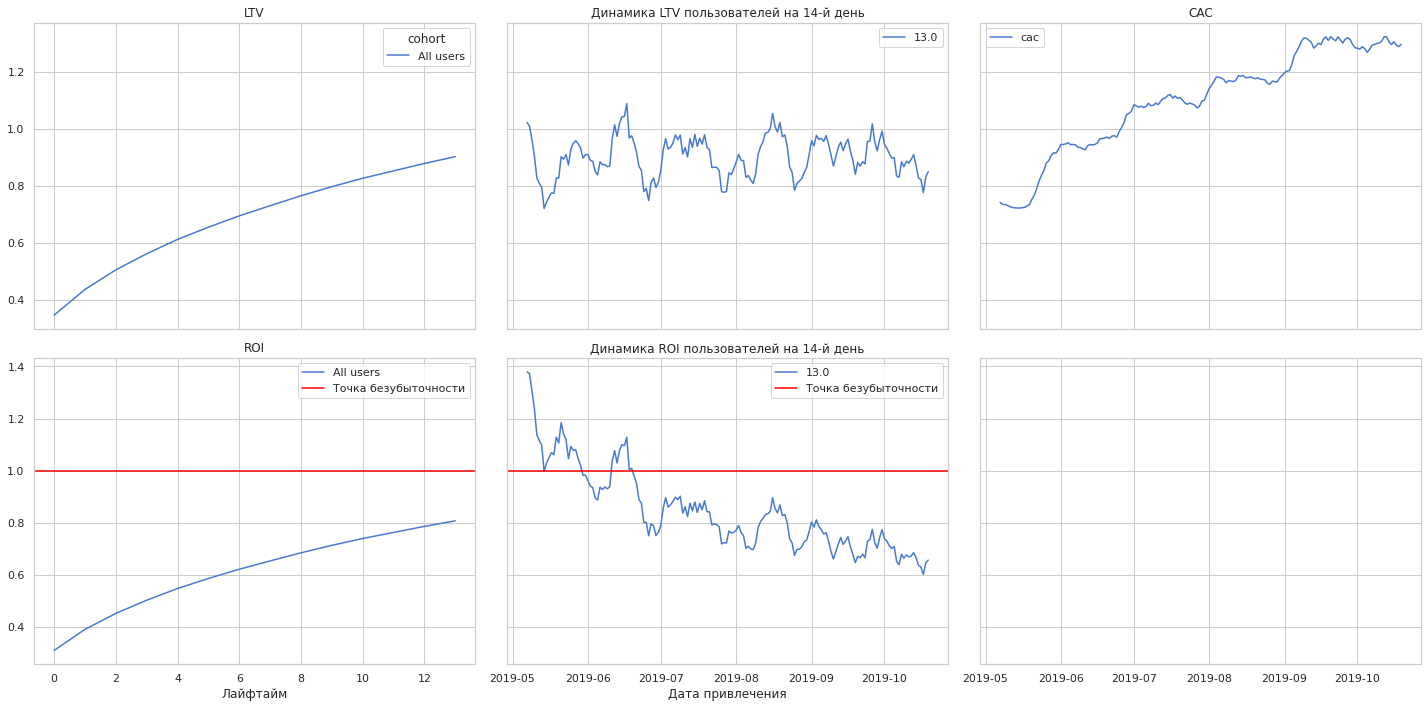

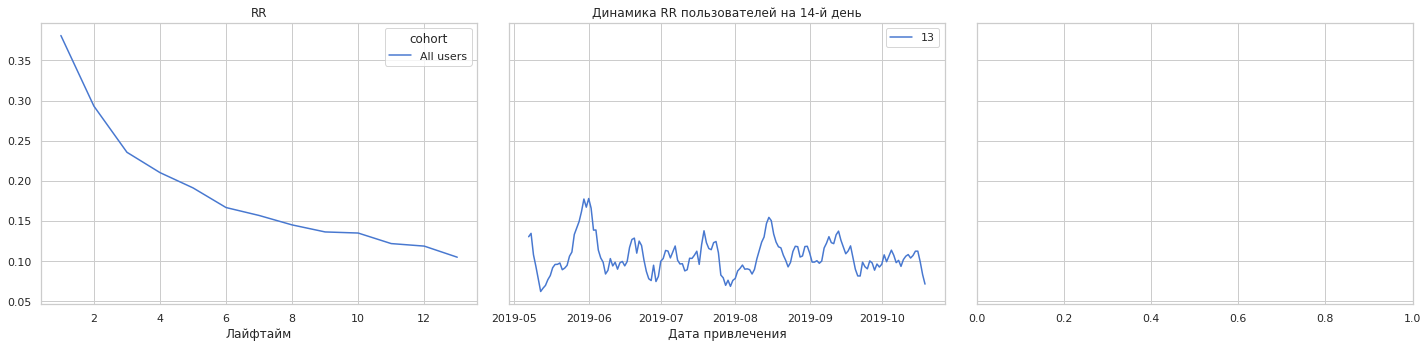

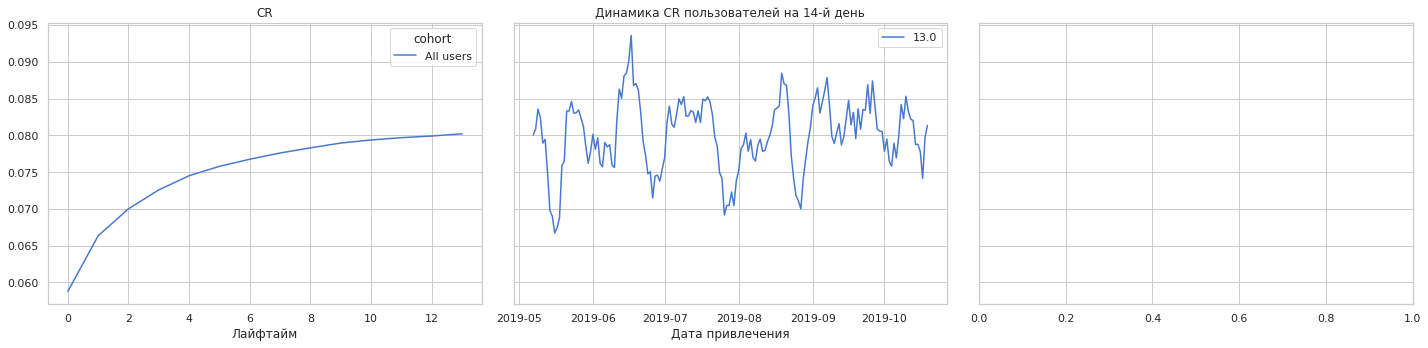

In [30]:
split([],7)

Исходя из данных графиков, анализ ключевых метрик окупаемости рекламы выявляет следующие тенденции и выводы:
* **LTV (Lifetime Value)**: Показатель LTV демонстрирует устойчивый рост на протяжении всего анализируемого периода, что говорит о повышении ценности пользователей для бизнеса с течением времени.
* **CAC (Customer Acquisition Cost)**: Несмотря на некоторые колебания, общая тенденция CAC показывает тенденцию к росту, что может свидетельствовать о повышении стоимости привлечения новых клиентов.
* **ROI (Return on Investment)**: ROI в данном анализе можно считать неудовлетворительным, так как он не достигает точки безубыточности на протяжении всего периода, что указывает на недостаточную эффективность инвестиций в привлечение клиентов.
* **Динамика ROI**: Тренд ROI пользователей идет на снижение, и хотя он пересекает точку безубыточности только в середине июня 2019 года, общая тенденция к снижению вызывает беспокойство и требует дальнейшего анализа и возможных корректировок в стратегии.
* **RR (Retention Rate)**: RR демонстрирует тренд к спаду, что указывает на снижение уровня удержания пользователей и может сигнализировать о необходимости улучшения пользовательского опыта или дополнительных усилий по удержанию клиентов.
* **CR (Conversion Rate)**: CR имеет тренд к росту, что является положительным сигналом. Увеличение конверсии может быть результатом улучшений в процессе привлечения и взаимодействия с пользователями.

### Анализ окупаемости по устройствам

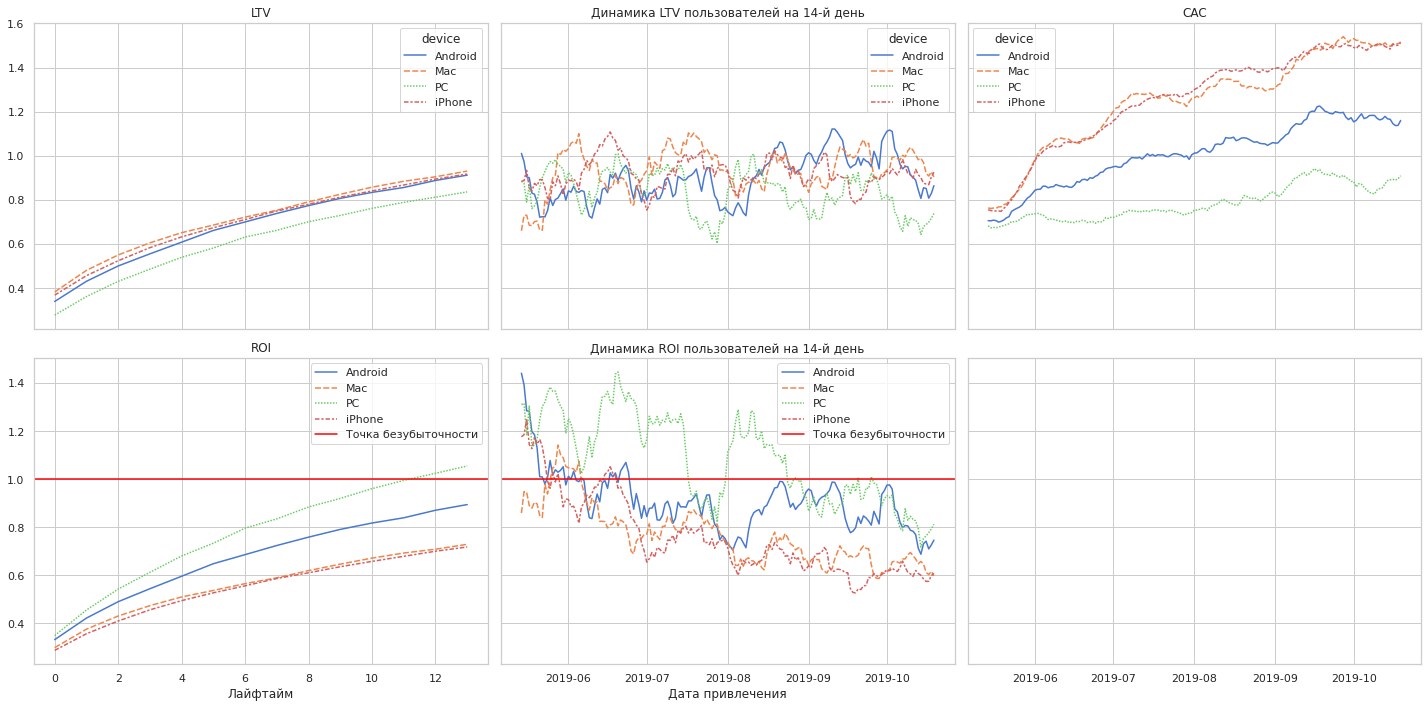

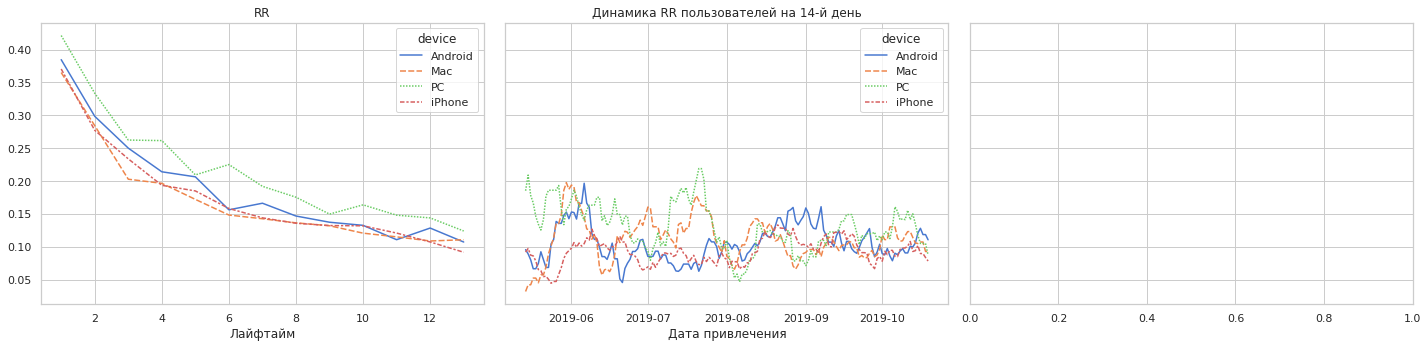

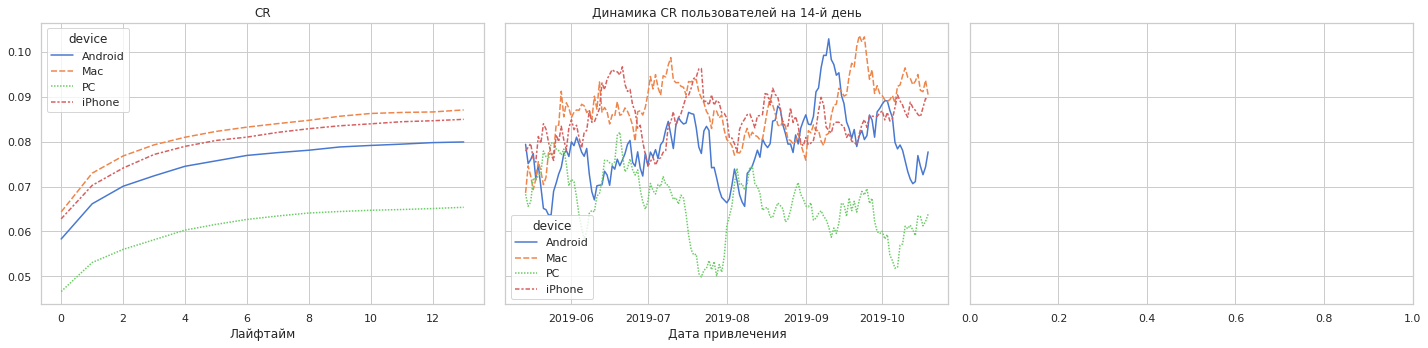

In [31]:
split(['device'],14)

Исходя из данных графиков, анализ ключевых метрик окупаемости рекламы, разделенных по типам устройств выявляет следующие тенденции и выводы:
* **LTV (Lifetime Value)**: Пользователи, использующие Mac, демонстрируют наивысший LTV, что говорит о их высокой ценности для бизнеса. В противоположность, пользователи с PC имеют самый низкий LTV, что может указывать на необходимость пересмотра стратегий удержания и монетизации для этой группы.
* **CAC (Customer Acquisition Cost)**: Затраты на привлечение пользователей с iPhone и Mac оказываются наивысшими, что может быть связано с более высокой конкуренцией за рекламные места в экосистеме Apple или с более дорогими рекламными кампаниями, нацеленными на эту аудиторию. В то же время, CAC для пользователей с PC самый низкий, что делает эту группу наиболее экономичной в привлечении.
* **ROI (Return on Investment)**: Пользователи с PC демонстрируют успешный ROI, становясь выше точки безубыточности на ближе к концу всего анализируемого периода.
* **Динамика ROI**: Большинство устройств оказались ниже точки безубыточности еще в начале анализируемого периода, но пользователи с устройством PC окончательно оказались ниже точки безубыточности лишь в конце июля.
* **RR (Retention Rate)**:Наивысший RR наблюдается у пользователей PC, что свидетельствует о высокой степени удержания пользователей этой группы. Пользователи iPhone показывают наименьший RR, что может указывать на проблемы с удержанием клиентов среди этой аудитории.
* **CR (Conversion Rate)**:Наибольший CR наблюдается у пользователей Mac, что указывает на высокую эффективность конверсий среди этой группы. В то же время, пользователи PC демонстрируют наименьший CR, что может быть связано с менее эффективными стратегиями конверсии для данной аудитории.

### Анализ окупаемости по странам

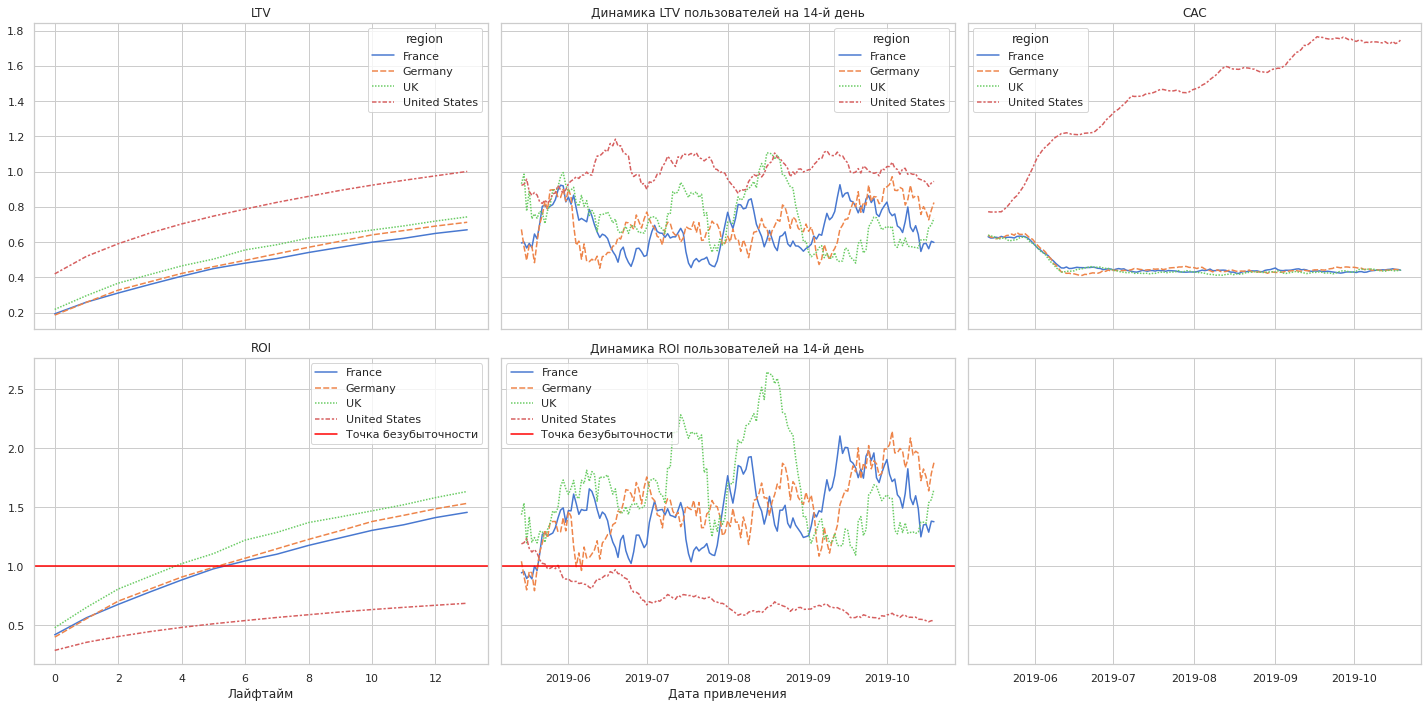

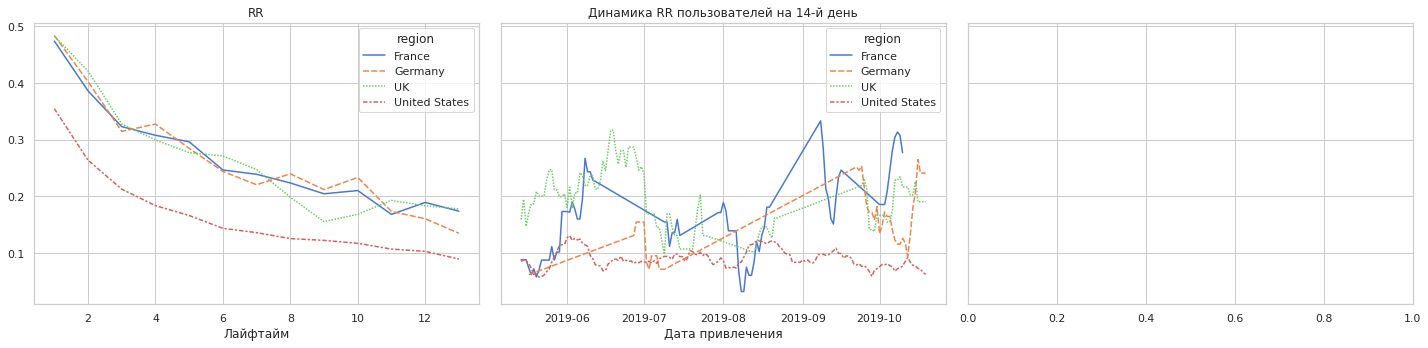

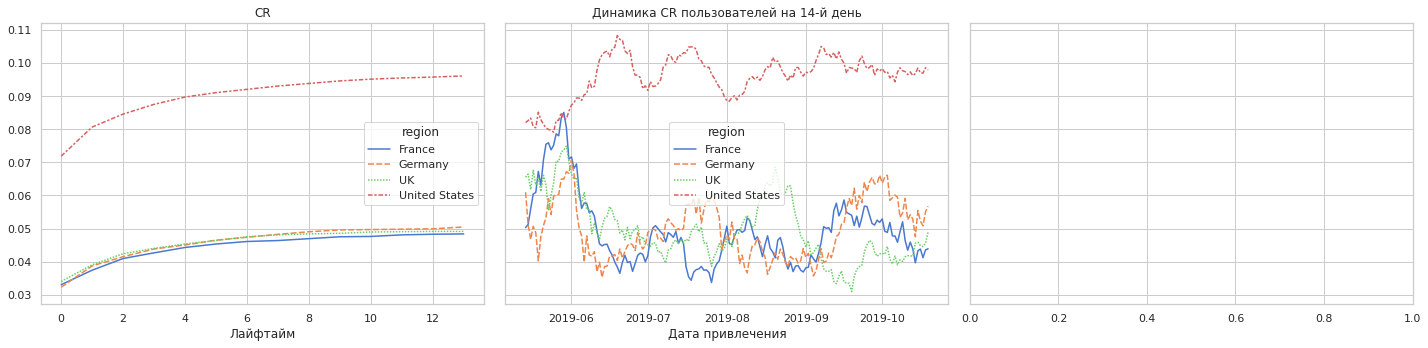

In [32]:
split(['region'],14)

Исходя из данных графиков, анализ ключевых метрик окупаемости рекламы, разделенных по регионам выявляет следующие тенденции и выводы:
* **LTV (Lifetime Value)**: Пользователи из региона United States демонстрируют наивысший LTV, что указывает на их высокую ценность для бизнеса.
* **CAC (Customer Acquisition Cost)**: Интересной тенденцией является рост CAC исключительно для пользователей из United States, что может отражать увеличение конкуренции или стоимости рекламных мест в этом регионе. Для остальных регионов CAC остается относительно стабильным на низком уровне, что говорит о неизменной стратегий привлечения клиентов определенного региона.
* **ROI (Return on Investment)**: Хотя тренд к росту ROI наблюдается во всех рассматриваемых регионах, только пользователи из UK, Germany, и France демонстрируют устойчиво положительный ROI, пересекая точку безубыточности. Это свидетельствует о том, что маркетинговые стратегии в этих регионах окупаются и приносят прибыль.
* **Динамика ROI**: Пользователи из UK, Germany, и France характеризуются колебаниями в ROI, но при этом остаются выше точки безубыточности, что говорит о стабильной прибыльности инвестиций в рекламу. В отличие от этого, пользователи из United States, несмотря на высокий LTV, на протяжени всего анализируемого периода ROI ниже точки безубыточности, что может указывать на необходимость оптимизации расходов на рекламу или пересмотра стратегий удержания.
* **RR (Retention Rate)**: Процент удержания клиентов самый низкий для региона United States, что указывает на сложности в удержании пользователей в этом регионе на длительный срок. Это может быть связано с высокой конкуренцией или особенностями потребительского поведения.
* **CR (Conversion Rate)**: Наивысший коэффициент конверсии наблюдается среди пользователей из United States, что свидетельствует об эффективности маркетинговых кампаний в привлечении клиентов в этом регионе. Однако, это не перекрывает высокую стоимость привлечения и низкий уровень удержания, что приводит к отрицательному ROI.

### Анализ окупаемости по рекламным каналам

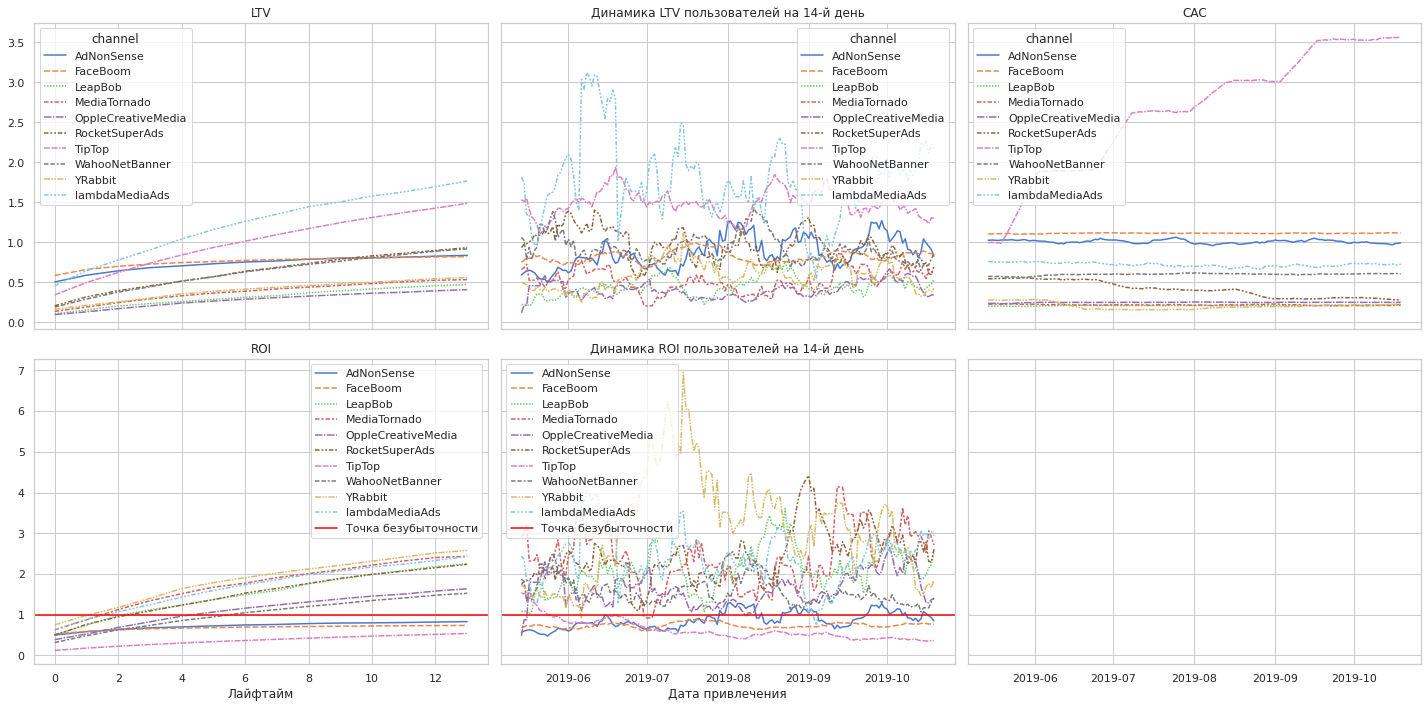

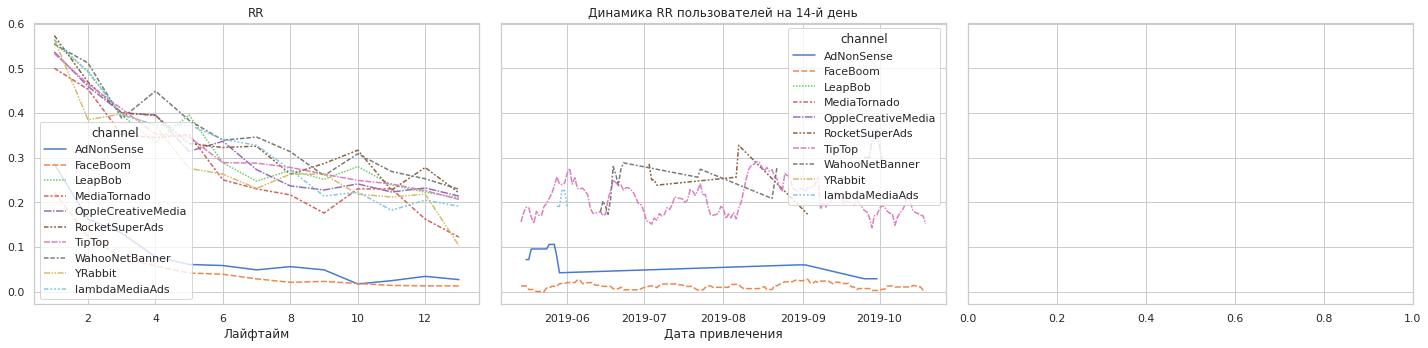

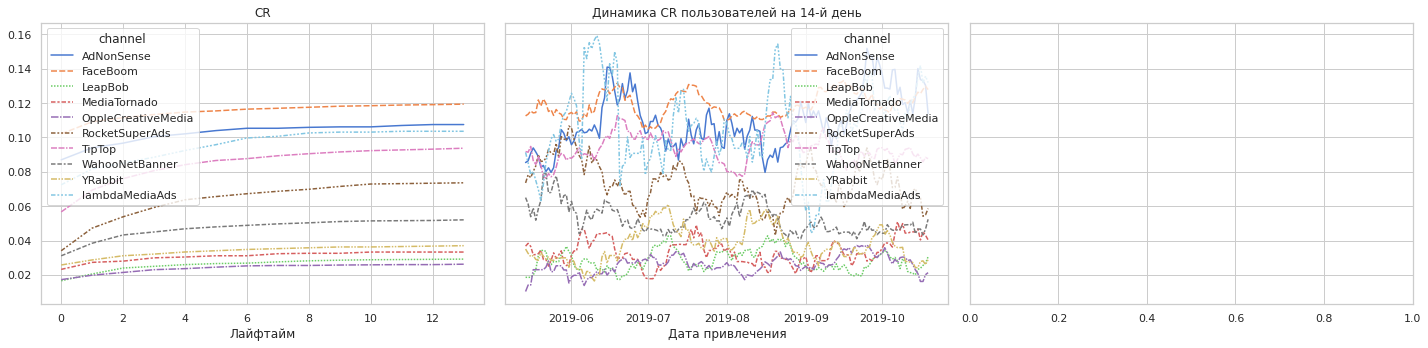

In [33]:
split(['channel'],14)

Исходя из данных графиков, анализ ключевых метрик окупаемости рекламы, разделенных по рекламным каналам выявляет следующие тенденции и выводы:
* **LTV (Lifetime Value)**: Высочайший LTV наблюдается у пользователей, привлеченных через рекламные каналы lambdaMediaAds и TipTop. Это говорит о том, что эти каналы привлекают наиболее ценных клиентов, что может быть обусловлено спецификой аудитории, на которую ориентированы эти платформы, или эффективностью их рекламных стратегий.
* **CAC (Customer Acquisition Cost)**: Рекламный канал TipTop демонстрирует значительный рост CAC, что может указывать на увеличение конкуренции за рекламные места или необходимость оптимизации рекламных материалов и стратегий для снижения стоимости привлечения. Остальные каналы показывают стабильный CAC, что говорит о контролируемых расходах на привлечение.
* **ROI (Return on Investment)**: YRabbit выделяется как лидер по ROI, что делает его наиболее эффективным каналом в плане окупаемости инвестиций в рекламу. Все каналы, кроме AdNonSense, FaceBoom и TipTop, демонстрируют тренд к росту ROI, но остаются за точкой безубыточности, что подчеркивает необходимость стратегических изменений для повышения их эффективности.
* **Динамика ROI**: YRabbit не только лидирует по ROI, но и в июне 2019 года значительно оторвался от других каналов по привлечению пользователей, что подтверждает его высокую эффективность и возможно указывает на удачное стечение обстоятельств, связанных с таргетингом или рекламными креативами.
* **RR (Retention Rate)**: Наименьший RR наблюдается у рекламных каналов AdNonSense и FaceBoom, что может указывать на проблемы с удержанием пользователей, привлеченных через эти каналы.
* **CR (Conversion Rate)**: Наибольший CR зафиксирован у рекламного канала FaceBoom, что демонстрирует высокую эффективность конверсии пользователей через этот канал по сравнению с другими.

### Окупается ли реклама, направленная на привлечение пользователей в целом? 

На основе анализа метрик, можно утверждать, что **реклама не окупается** в целом, учитывая, что общий тренд ROI (Return on Investment) демонстрирует снижение и не достигает точки безубыточности на протяжении всего анализируемого периода. Это указывает на то, что инвестиции в рекламу не приносят достаточного дохода для покрытия расходов на привлечение пользователей.

### Какие устройства, страны и рекламные каналы могут оказывать **негативное влияние** на окупаемость рекламы?

* **Устройства**: **Пользователи iPhone и Mac** связаны с более высокими CAC, что может негативно влиять на окупаемость из-за более высоких затрат на привлечение. В то же время, **пользователи PC** показывают лучший ROI, но имеют низкий CR (Conversion Rate), что также может быть проблемой.
* **Страны**: **United States** выделяется высоким CAC и низким RR (Retention Rate), что в сочетании с неудовлетворительным ROI делает этот регион проблемным с точки зрения окупаемости рекламы.
* **Рекламные каналы**: **TipTop и AdNonSense могут считаться проблемными**. TipTop, несмотря на высокий LTV, имеет значительный рост CAC и неудовлетворительный ROI. AdNonSense, наряду с FaceBoom, показывает низкий RR, что может указывать на проблемы удержания клиентов.

### Чем могут быть вызваны проблемы окупаемости?

* **Высокие CAC**: Рост стоимости привлечения клиентов, особенно заметный для некоторых устройств и каналов, напрямую влияет на окупаемость, делая рекламные кампании менее прибыльными.
* **Низкий RR**: Проблемы с удержанием клиентов могут быть вызваны неудовлетворенностью продуктом, плохим пользовательским опытом или неэффективными стратегиями удержания.
* **Недостаточный CR**: Низкие показатели конверсии, особенно заметные для пользователей PC, могут говорить о неэффективных рекламных стратегиях или неправильном таргетинге.
* **Недостаточный LTV**: Низкий LTV для определенных групп пользователей (например, пользователи PC) может не покрывать даже низкие CAC, что делает привлечение таких пользователей невыгодным.
* **Недостаточный ROI**: Это может быть следствием высоких CAC, низкого RR, и неэффективного CR, что в сумме делает инвестиции в рекламу не окупаемыми.
* **Неэффективные стратегии удержания и монетизации**: Если пользователи не совершают повторных покупок или не приносят дохода другими способами после привлечения, это снижает LTV и, соответственно, ROI.
* **Неправильный таргетинг или рекламные материалы**: Если реклама не привлекает аудиторию, которая склонна к конверсии, или рекламные креативы неэффективны, это ведет к высокому CAC при низком ROI.
  
* *Сезонные колебания: Временные спады в ROI могут быть связаны с сезонными изменениями в поведении пользователей или в эффективности рекламных каналов.*

## Вывод

Анализ данных о привлечении пользователей и их взаимодействии с приложением Procrastinate Pro+ за период с 1 мая по 27 октября 2019 года выявил ряд важных тенденций и проблем маркетинговых кампаний. В ходе исследования были тщательно обработаны и проанализированы три ключевых датасета: visit, order и cost. Анализ позволил определить ключевые метрики, такие как LTV, ROI, Retention Rate и Conversion Rate, а также выявить основные тенденции и проблемы в привлечении и удержании пользователей.

Приложение пользуется популярностью на рынке США, особенно среди пользователей iPhone и Mac, где наблюдается высокая доля платящих пользователей. Однако, несмотря на успешное привлечение пользователей и их активность, общая окупаемость инвестиций в рекламу неудовлетворительна, поскольку ROI не достигает точки безубыточности. Это указывает на необходимость оптимизации маркетинговых стратегий и возможной корректировки подходов к удержанию и монетизации пользователей.

Проведенный анализ приложения Procrastinate Pro+ выявил как позитивные, так и негативные стороны текущей маркетинговой стратегии.
  
* Позитивные моменты:
    
1. Высокая ценность пользователей (LTV): LTV демонстрирует устойчивый рост, свидетельствующий о повышении ценности пользователей для бизнеса.
2. Эффективная конверсия: Conversion Rate показывает позитивную тенденцию роста, что указывает на успешность стратегий привлечения и взаимодействия с пользователями.
3. Высокая популярность на рынке США: Приложение пользуется высокой популярностью в США, где наблюдается наибольшее количество пользователей и наибольшая доля платящих пользователей.

* Негативные моменты:
    
1. Низкая окупаемость рекламы: ROI не достигает точки безубыточности, что указывает на недостаточную эффективность инвестиций в привлечение клиентов.
2. Низкий коэффициент удержания пользователей: Retention Rate демонстрирует тенденцию к спаду, что свидетельствует о необходимости улучшения пользовательского опыта и усилий по удержанию клиентов.
3. Высокая стоимость привлечения клиентов (CAC): CAC демонстрирует тенденцию к росту, что может сделать рекламные кампании менее прибыльными.

* Причины неэффективности привлечения пользователей:

1. Высокие CAC: Рост стоимости привлечения клиентов, особенно заметный для некоторых устройств и каналов, напрямую влияет на окупаемость, делая рекламные кампании менее прибыльными.
2. Низкий Retention Rate: Проблемы с удержанием клиентов могут быть вызваны неудовлетворенностью продуктом, плохим пользовательским опытом или неэффективными стратегиями удержания.
3. Недостаточный Conversion Rate: Низкие показатели конверсии, особенно заметные для пользователей PC, могут говорить о неэффективных рекламных стратегиях или неправильном таргетинге.
4. Недостаточный LTV: Низкий LTV для определенных групп пользователей (например, пользователей PC) может не покрывать даже низкие CAC, что делает привлечение таких пользователей невыгодным.
5. Недостаточный ROI: Это может быть следствием высоких CAC, низкого Retention Rate, и неэффективного Conversion Rate, что в сумме делает инвестиции в рекламу не окупаемыми.
6. Неэффективные стратегии удержания и монетизации: Если пользователи не совершают повторных покупок или не приносят дохода другими способами после привлечения, это снижает LTV и, соответственно, ROI.
7. Неправильный таргетинг или рекламные материалы: Если реклама не привлекает аудиторию, которая склонна к конверсии, или рекламные креативы неэффективны, это ведет к высокому CAC при низком ROI.
8. Сезонные колебания: Временные спады в ROI могут быть связаны с сезонными изменениями в поведении пользователей или в эффективности рекламных каналов.


Рекомендации для отдела маркетинга:

* Оптимизация стратегий привлечения клиентов: Необходимо пересмотреть рекламные каналы и таргетинг с целью оптимизации CAC.
* Улучшение пользовательского опыта: Необходимо сосредоточиться на создании более привлекательного пользовательского опыта с целью повышения Retention Rate.
* Создание эффективных рекламных материалов: Необходимо разработать более эффективные рекламные материалы, которые будут привлекать внимание целевой аудитории и способствовать конверсии.
* Анализ и оптимизация рекламных каналов: Важно провести детальный анализ эффективности каждого рекламного канала и оптимизировать рекламные кампании для каждого из них.
* Усиление маркетинговых усилий по удержанию клиентов: Необходимо разрабатывать и внедрять эффективные стратегии удержания клиентов, которые будут способствовать повышению LTV.
* Повышение эффективности монетизации: Необходимо оптимизировать методы монетизации приложения, чтобы увеличить LTV и увеличить долю платящих пользователей.
* Сфокусироваться на наиболее эффективных каналах: Оптимизация маркетинговых усилий должна быть направлена на наиболее эффективные каналы, которые демонстрируют наибольшую окупаемость инвестиций (ROI).
* Мониторинг и анализ ключевых показателей: Отдел маркетинга должен регулярно отслеживать ключевые показатели, такие как LTV, CAC, Retention Rate, Conversion Rate и ROI, чтобы идентифицировать проблемные зоны и оптимизировать маркетинговую стратегию.

Приложение Procrastinate Pro+ обладает потенциалом для успеха, но необходимо принять ряд мер для повышения окупаемости инвестиций в маркетинг. Усилия по оптимизации рекламных стратегий, усовершенствованию пользовательского опыта и повышению эффективности монетизации помогут повысить ROI и увеличить привлекательность приложения для пользователей.